In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dir = "../data/"

In [6]:
# Read in the data for both imports and exports
df_imports = pd.read_csv(dir + "LivestockMeat_Imports.csv")
df_exports = pd.read_csv(dir + "LivestockMeat_Exports.csv")

# print head
print(df_imports.head(5))
print(df_exports.head(5))

print(df_imports.shape)
print(df_exports.shape)

   SOURCE_ID      HS_CODE                                     COMMODITY_DESC  \
0         58  102902012.0  Cows, live, imported for dairy purposes, weigh...   
1         58  102902012.0  Cows, live, imported for dairy purposes, weigh...   
2         58  102100050.0  Bovine animals, purebred breeding, except dair...   
3         58  102100050.0  Bovine animals, purebred breeding, except dair...   
4         58  102100050.0  Bovine animals, purebred breeding, except dair...   

   GEOGRAPHY_CODE GEOGRAPHY_DESC  ATTRIBUTE_DESC UNIT_DESC  YEAR_ID  \
0            1220         Canada  US Import, QTY        NO     1996   
1            1220         Canada  US Import, QTY        NO     1997   
2               1          World  US Import, QTY        NO     1994   
3               1          World  US Import, QTY        NO     1994   
4               1          World  US Import, QTY        NO     1994   

   TIMEPERIOD_ID  AMOUNT  
0             12   851.0  
1              1  1077.0  
2          

In [13]:
# group by year_id and sum over 'Amount' column to get total imports/exports per year
df_imports_year = df_imports.groupby(['YEAR_ID'])
df_exports_year = df_exports.groupby(['YEAR_ID'])

# create new dataframe with total imports/exports per year
dfs_imports_list = []
dfs_exports_list = []

# for each year, sum over 'Amount' column to get total imports/exports per year and save in the new dataframe
for year, group in df_imports_year:
    df_imports_tot_per_year = pd.DataFrame({'YEAR_ID': year, 'AMOUNT': group['AMOUNT'].sum()})
    dfs_imports_list.append(df_imports_tot_per_year)

for year, group in df_exports_year:
    df_exports_tot_per_year = pd.DataFrame({'YEAR_ID': year, 'AMOUNT': group['AMOUNT'].sum()})
    dfs_exports_list.append(df_exports_tot_per_year)

# convert list of dataframes to single dataframe
df_imports_yearly = pd.concat(dfs_imports_list)
df_exports_yearly = pd.concat(dfs_exports_list)

# print head
print(df_imports_yearly.head(5))
print(df_exports_yearly.head(5))

   YEAR_ID        AMOUNT
0     1989  1.702718e+10
0     1990  1.784900e+10
0     1991  1.741726e+10
0     1992  1.695237e+10
0     1993  1.731756e+10
   YEAR_ID        AMOUNT
0     1989  1.420746e+10
0     1990  1.457129e+10
0     1991  1.712753e+10
0     1992  2.043494e+10
0     1993  2.338679e+10


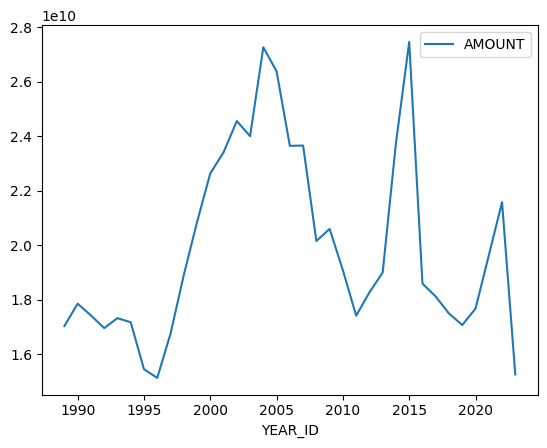

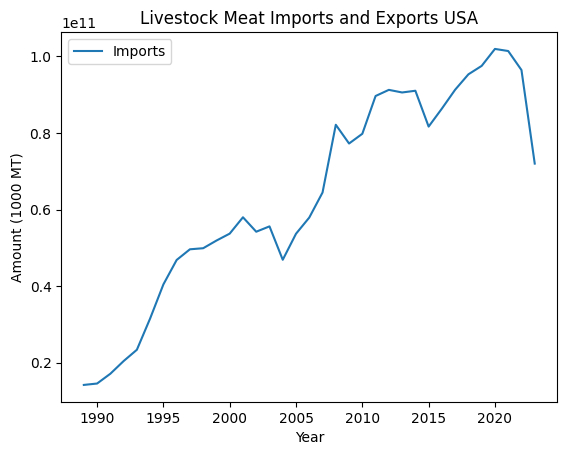

In [15]:
# make the year_id the index
meat_imports_df = df_imports_yearly.set_index('YEAR_ID')
meat_exports_df = df_exports_yearly.set_index('YEAR_ID')

# plot the data on the same graph with a legend, title, and axis labels
plt.plot(meat_imports_df, 'r', meat_exports_df, 'b')
plt.legend(['Imports', 'Exports'])
plt.title('Livestock Meat Imports and Exports USA')
plt.xlabel('Year')
plt.ylabel('Amount (1000 MT)')
plt.show()